<a href="https://colab.research.google.com/github/anagha20041/Sales-prediction/blob/main/Icecream_Sales_using_temprature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import datasets


In [5]:
sales_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SalesData.csv')

In [6]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [7]:
sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Visualize dataset

<Axes: xlabel='Temperature', ylabel='Revenue'>

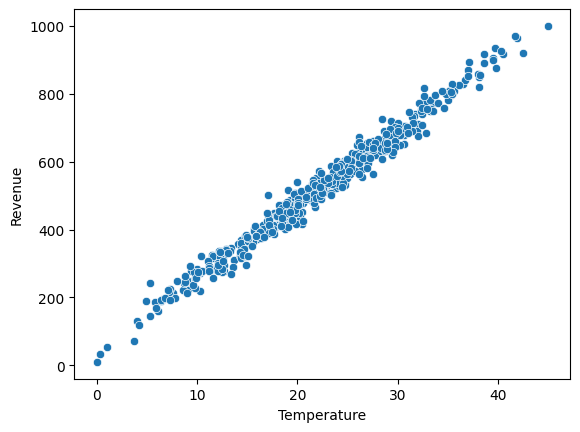

In [12]:

sns.scatterplot(x='Temperature',y='Revenue',data=sales_df)

# create testing and training dataset

In [15]:
X_train=sales_df['Temperature']
y_train=sales_df['Revenue']


# Build and train model

In [17]:
X_train.shape


(500,)

In [19]:
y_train.shape

(500,)

In [46]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1,input_shape=[1]))


In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss='mean_squared_error')

In [49]:
epochs_hist = model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
16/16 [==============================] - 0s 2ms/step - loss: 308718.9062
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 267222.1250
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 229683.3594
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 195818.9375
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 166459.4062
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 140492.4375
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 117565.1562
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 98301.4609
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 81006.7656
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 66753.9062
Epoch 11/1000
16/16 [==============================] - 0s 2ms/step - loss: 54468.2539
Epoch 12/1000
16/16 [==============================] - 0

# Evaluate the Model

In [41]:
epochs_hist.history.keys()

dict_keys(['loss'])

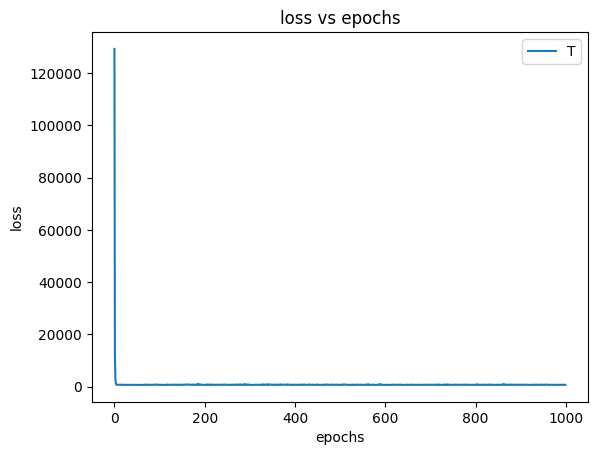

In [42]:
plt.plot(epochs_hist.history['loss'])
plt.title('loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('Traning Loss')

In [43]:
model.get_weights()

[array([[-0.00985896,  0.04406327, -0.01113919,  3.609891  ,  0.03434314,
          1.817954  , -2.1301975 , -0.02450919,  0.02851868, -0.03961267]],
       dtype=float32),
 array([ 0.222142  , -0.8405407 ,  0.3792061 ,  5.211729  , -0.67000335,
         3.5174947 , -3.8152056 ,  0.3233069 , -0.86401874,  1.2484405 ],
       dtype=float32),
 array([[-2.5801144e-03],
        [ 2.1585405e-02],
        [ 8.0810091e-04],
        [ 3.6650448e+00],
        [ 1.5779428e-02],
        [ 1.8653759e+00],
        [-2.1747651e+00],
        [-2.0513183e-02],
        [ 1.8697714e-03],
        [-1.0724226e-03]], dtype=float32),
 array([11.079424], dtype=float32)]

In [44]:
Temp=5
Revenue=model.predict([Temp])
print('Revenue predictions using trained ANN',Revenue)

1/1 [==============================] - 0s 101ms/step
Revenue predictions using trained ANN [[151.28252]]


16/16 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Revenue generated vs Temp @Ice Cream Stand')

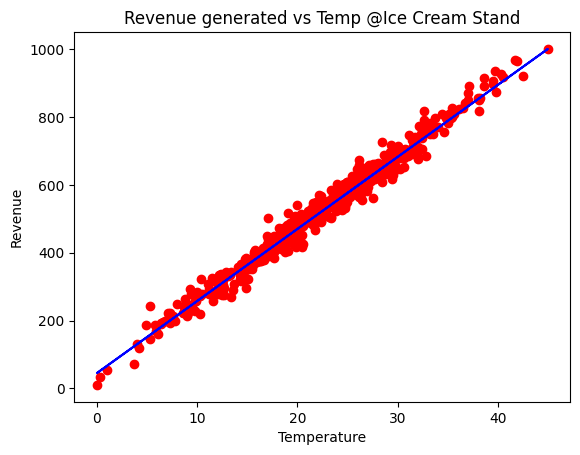

In [45]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='blue')
plt.ylabel('Revenue')
plt.xlabel('Temperature')
plt.title('Revenue generated vs Temp @Ice Cream Stand')

# confirm using regression kit in scikit learn

In [51]:
X_train= X_train.values.reshape(-1,1)

In [52]:
X_train.shape

(500, 1)

In [55]:
y_train=y_train.values.reshape(-1,1)

In [56]:
y_train.shape

(500, 1)

In [57]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)


LinearRegression()

In [58]:
print('Linear Model Coeff(m)', regressor.coef_)
print('Linear Model Coeff(b)', regressor.intercept_)

Linear Model Coeff(m) [[21.44362551]]
Linear Model Coeff(b) [44.83126709]


Text(0.5, 1.0, 'Revenue generated vs Temp @Ice Cream Stand')

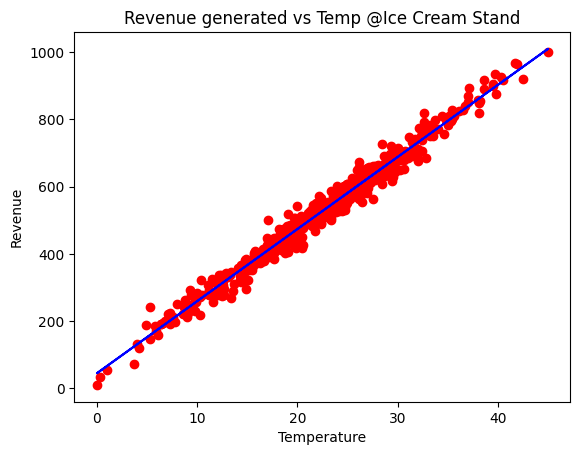

In [59]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.ylabel('Revenue')
plt.xlabel('Temperature')
plt.title('Revenue generated vs Temp @Ice Cream Stand')